# NoSQL and MongoDB

#### Flexible and distributed data storrage ... 

## Outline

* XML 
* JSON
* MongoDB
* Use Case: Restaurant Rating Site

## XML
<img src="IMG/xml.png" width=200>

***Extensible Markup Language (XML)*** is a markup language that defines a set of rules for encoding documents in a format that is both human-readable and machine-readable. 
The design goals of XML emphasize simplicity, generality, and usability across the Internet. It is a textual data format with strong support via Unicode for different human languages. Although the design of XML focuses on documents, the language is widely used for the representation of arbitrary data structures such as those used in web services. 

### XML Tree Representation of Data
<img SRC="IMG/xml_tree.gif" width=800>

### Another XML Example
```
<?xml version="1.0"?>
<data>
    <country name="Liechtenstein">
        <rank>1</rank>
        <year>2008</year>
        <gdppc>141100</gdppc>
        <neighbor name="Austria" direction="E"/>
        <neighbor name="Switzerland" direction="W"/>
    </country>
    <country name="Singapore">
        <rank>4</rank>
        <year>2011</year>
        <gdppc>59900</gdppc>
        <neighbor name="Malaysia" direction="N"/>
    </country>
    <country name="Panama">
        <rank>68</rank>
        <year>2011</year>
        <gdppc>13600</gdppc>
        <neighbor name="Costa Rica" direction="W"/>
        <neighbor name="Colombia" direction="E"/>
    </country>
</data>
```


### XML with ***Python***

In [2]:
#in colab, we need to clone the data from the repo
!git clone https://github.com/keuperj/DATA.git

Cloning into 'DATA'...
remote: Enumerating objects: 96, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 96 (delta 1), reused 9 (delta 1), pack-reused 87
Unpacking objects: 100% (96/96), done.
Checking out files: 100% (66/66), done.


In [3]:
import xml.etree.ElementTree as ET
tree = ET.parse('DATA/example.xml') #parse xml document
root = tree.getroot() #get tree root


In [4]:
#get first elements of the tree
for child in root:
    print( child.tag, child.attrib)

country {'name': 'Liechtenstein'}
country {'name': 'Singapore'}
country {'name': 'Panama'}


In [5]:
#iterate over the neighbor attribute
for neighbor in root.iter('neighbor'):
    print (neighbor.attrib)

{'name': 'Austria', 'direction': 'E'}
{'name': 'Switzerland', 'direction': 'W'}
{'name': 'Malaysia', 'direction': 'N'}
{'name': 'Costa Rica', 'direction': 'W'}
{'name': 'Colombia', 'direction': 'E'}


In [6]:
#get  all country nodes and extract attributes
for country in root.findall('country'):
    rank = country.find('rank').text
    name = country.get('name')
    print (name, rank)

Liechtenstein 1
Singapore 4
Panama 68


#### more on the ***Python*** ***XML*** API: https://docs.python.org/2/library/xml.etree.elementtree.html#

<H3>Document based Data Bases</H3>
<BR>
<img src="IMG/MongoDB.png">
    
* Data stored in documents (files)
* Flexible structure in documents (like XML)
* Queries like in SQL
* Support distributed operations (***MapReduce***)  


<H2>BASE Criteria for (NoSQL) Databases</H2>
<H3><font color="red">Ba</font>sically available, <font color="red">S</font>oft-State, <font color="red">E</font>ventual Consistency</H3>

* BASE derived from CAP-Theorem 
* Replaces ACID for distributed DBs

<H2>Use Case:</H2>
<H3>A Restaurant rating system:</H3>
<img src="IMG/TA.png" width="65%">


<H3>Implementation with MongoDB</H3>
<BR>
<img src="IMG/MongoDB.png">
    
* Properties of MongoDB
    * Document oriented DB
        * Structure description in JSON
        <img src="IMG/json.jpg">
   


* Data: open data set with restaurants and ratings:
    * https://raw.githubusercontent.com/mongodb/docs-assets/primer-dataset/primer-dataset.json

<H3>Example: JSON Scheme for a restaurant </H3>

```
{
  "address": {
     "coord": [ -73.856077, 40.848447 ],
     "street": "Morris Park Ave",
     "zipcode": "10462"
  },
  "borough": "Bronx",
  "cuisine": "Bakery",
  "grades": [
     { "date": { "$date": 1393804800000 }, "score": 2 },
     { "date": { "$date": 1378857600000 }, "score": 6 },
     { "date": { "$date": 1358985600000 }, "score": 10 },  
  ],
  "name": "Morris Park Bake Shop",
  "restaurant_id": "30075445"
}
```

<H2>Hands on!</H2>

In [7]:
#NOTE: this will only work if you have a local MongoDB Server running 

#import MongoDB client module
from pymongo import MongoClient
import warnings
warnings.filterwarnings('ignore') 
#connect to MongoDB on localhost
client = MongoClient()


In [8]:
#how many worker nodes are working in th MongoDB Cluster?
client.nodes

frozenset()

<H3>What Data is on the  Cluster?</H3>

In [9]:
#see what databases are available
client.database_names()

['admin', 'config', 'demo', 'local', 'mydb', 'test']

In [10]:
#generate reference to "demo" database
db = client.demo

In [11]:
#list all collections 
db.collection_names()

['restaurants', 'myresults']

<H2>MongoDB Queries</H2>


In [12]:
db.restaurants.find().count()

25359

In [13]:
db.restaurants.find()[129]

{'_id': ObjectId('5cddbe4287ea9d7fab05db9c'),
 'address': {'building': '26',
  'coord': [-73.9983, 40.715051],
  'street': 'Pell Street',
  'zipcode': '10013'},
 'borough': 'Manhattan',
 'cuisine': 'Café/Coffee/Tea',
 'grades': [{'date': datetime.datetime(2014, 7, 10, 0, 0),
   'grade': 'A',
   'score': 10},
  {'date': datetime.datetime(2013, 7, 12, 0, 0), 'grade': 'A', 'score': 10},
  {'date': datetime.datetime(2013, 2, 11, 0, 0), 'grade': 'A', 'score': 9},
  {'date': datetime.datetime(2013, 1, 10, 0, 0), 'grade': 'P', 'score': 4},
  {'date': datetime.datetime(2012, 7, 27, 0, 0), 'grade': 'A', 'score': 12},
  {'date': datetime.datetime(2012, 2, 27, 0, 0), 'grade': 'A', 'score': 11},
  {'date': datetime.datetime(2011, 8, 12, 0, 0), 'grade': 'B', 'score': 24}],
 'name': 'Mee Sum Coffee Shop',
 'restaurant_id': '40365904'}

<H3>Structured Queries</H3>

* Number of restaurants in the city

In [14]:
db.restaurants.find({"borough": "Queens"}).count()

5656

* All entries with Score>10 and ZIP code 10075

In [15]:
db.restaurants.find({"grades.score": {"$gt": 10}, "address.zipcode": "10075"}).count()

79

<H3>Iterators</H3>

* e.g. all iterators in ZIP code 10075

In [16]:
cursor=db.restaurants.find({"cuisine": "Bakery","address.zipcode": "10075"})
for doc in cursor:
    print (doc["name"])
    

Annelies Pastries
Lady M Confections
Butterfield Express
The Belgian Cupcake


<H2>Map-Reduce with MongoDB</H2>
<H3>Compute histogram of review scores</H3>

In [17]:
from bson.code import Code
#map function
map = Code("function () {"
            "  this.grades.forEach(function(z) {"
            "    emit(z.score, 1);"
            "  });"
            "}")

#reduce function
reduce = Code("function (key, values) {"
              "  var total = 0;"
              "  for (var i = 0; i < values.length; i++) {"
              "    total += values[i];"
              "  }"
              "  return total;"
              "}")

result = db.restaurants.map_reduce(map, reduce, "myresults")

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Review Scores')

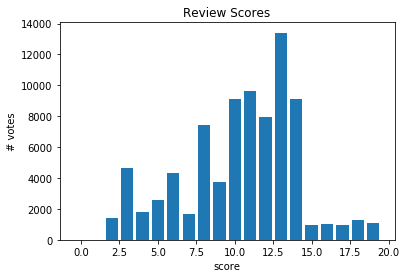

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
plt.figure()
df=pd.DataFrame(list(result.find()))
plt.bar(np.arange(20),df[0:20].value )
plt.xlabel('score')
plt.ylabel('# votes')
plt.title('Review Scores')

## Discussion